In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

## **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/My Drive/dataset-fixed/train'
test_dir = '/content/drive/My Drive/dataset-fixed/test'

categories = ['human-art', 'ai-generated']

## **Basic Dataset Summary**

In [ ]:
def count_images(directory):
    counts = {category: len(os.listdir(os.path.join(directory, category))) for category in categories}
    return counts

In [ ]:
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

In [ ]:
print("Training Dataset Counts:", train_counts)
print("Testing Dataset Counts:", test_counts)

Training Dataset Counts: {'human-art': 8750, 'ai-generated': 8750}
Testing Dataset Counts: {'human-art': 2188, 'ai-generated': 2188}


## **Class Distribution**

### Combine Counts

In [ ]:
train_data = [train_counts[cat] for cat in categories]
test_data = [test_counts[cat] for cat in categories]

### Bar Plot

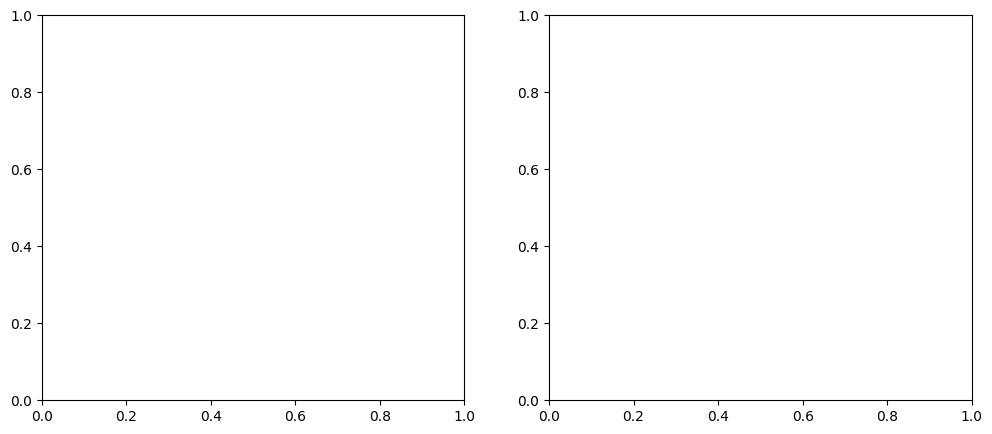

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

In [ ]:
sns.barplot(x=categories, y=train_data, ax=ax[0])
ax[0].set_title("Training Data Distribution")
ax[0].set_ylabel("Number of Images")

Text(4.444444444444466, 0.5, 'Number of Images')

In [ ]:
sns.barplot(x=categories, y=test_data, ax=ax[1])
ax[1].set_title("Testing Data Distribution")
ax[1].set_ylabel("Number of Images")

Text(511.7171717171717, 0.5, 'Number of Images')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## **Image Size Analysis**

In [ ]:
def analyze_image_sizes(directory):
    sizes = []
    for category in categories:
        folder_path = os.path.join(directory, category)
        for filename in os.listdir(folder_path):
            filepath = os.path.join(folder_path, filename)
            with Image.open(filepath) as img:
                sizes.append(img.size)
    return sizes

In [ ]:
train_sizes = analyze_image_sizes(train_dir)

In [ ]:
widths, heights = zip(*train_sizes)

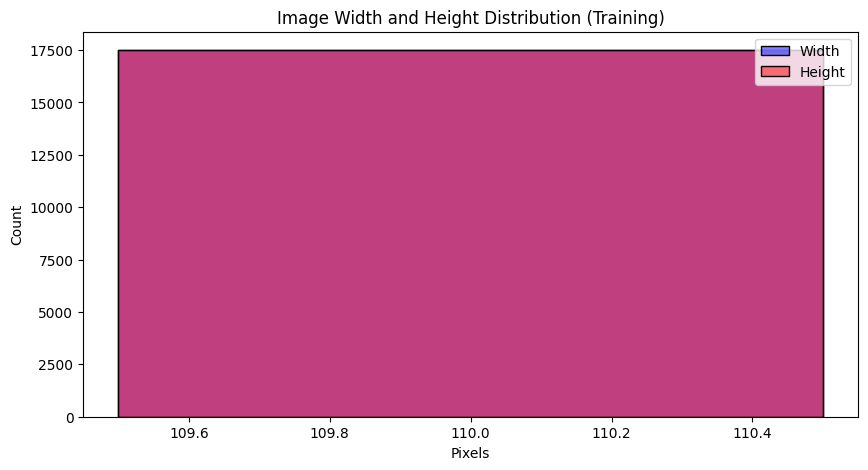

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(widths, kde=True, color="blue", label="Width")
sns.histplot(heights, kde=True, color="red", label="Height")
plt.title("Image Width and Height Distribution (Training)")
plt.xlabel("Pixels")
plt.legend()
plt.show()

## **Sample Images**

In [ ]:
def plot_sample_images(directory, n_samples=4):
    fig, axes = plt.subplots(len(categories), n_samples, figsize=(12, 6))

    for i, category in enumerate(categories):
        folder_path = os.path.join(directory, category)
        sample_files = np.random.choice(os.listdir(folder_path), n_samples, replace=False)
        for j, file in enumerate(sample_files):
            filepath = os.path.join(folder_path, file)
            with Image.open(filepath) as img:
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                if j == 0:
                    axes[i, j].set_title(category)

    plt.tight_layout()
    plt.show()

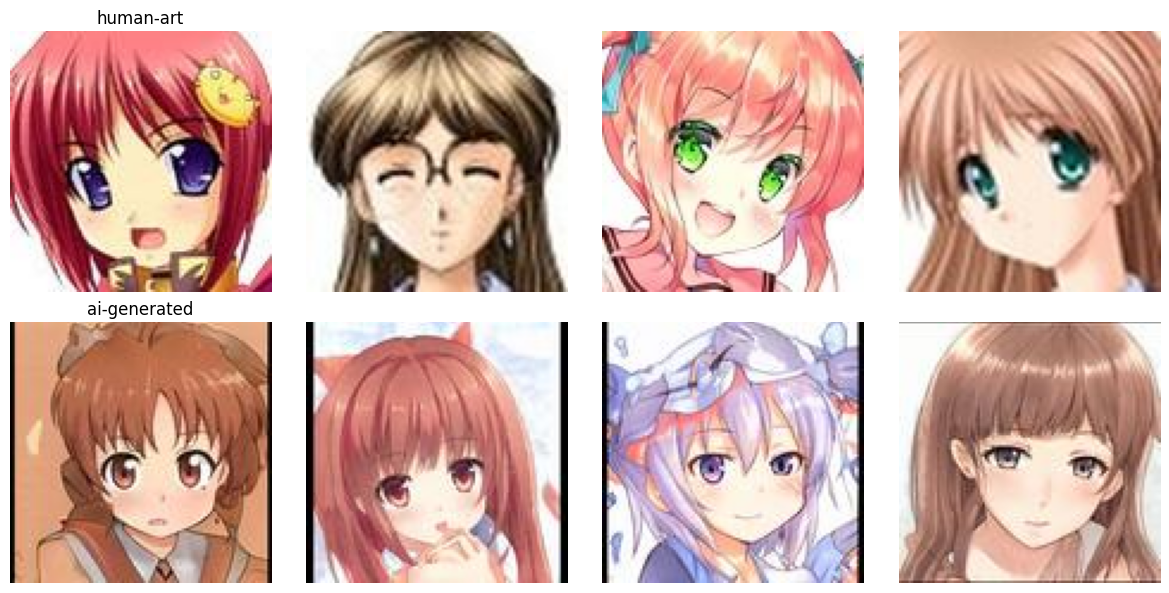

In [ ]:
plot_sample_images(train_dir)

## **Color Analysis**

In [ ]:
def compute_mean_rgb(directory):
    means = []
    for category in categories:
        folder_path = os.path.join(directory, category)
        for filename in os.listdir(folder_path):
            filepath = os.path.join(folder_path, filename)
            with Image.open(filepath) as img:
                img_array = np.array(img)
                if img_array.ndim == 3:
                    means.append(np.mean(img_array, axis=(0, 1)))
    return np.array(means)

In [ ]:
train_means = compute_mean_rgb(train_dir)

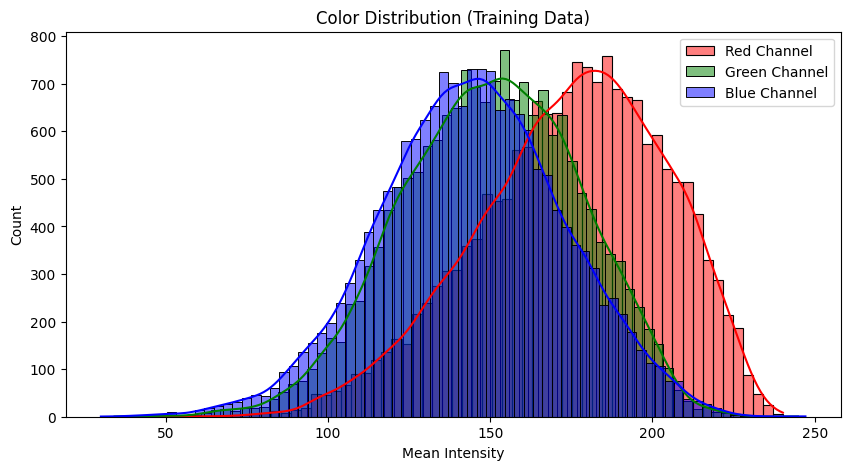

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(train_means[:, 0], color='red', kde=True, label='Red Channel')
sns.histplot(train_means[:, 1], color='green', kde=True, label='Green Channel')
sns.histplot(train_means[:, 2], color='blue', kde=True, label='Blue Channel')
plt.title("Color Distribution (Training Data)")
plt.xlabel("Mean Intensity")
plt.legend()
plt.show()